In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
mutual_funds_data =pd.read_csv('comprehensive_mutual_funds_data.csv')
df = mutual_funds_data.copy()
df.head(5)

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


# Data Processing

In [6]:
df.columns = df.columns.str.title()
print(df.columns)
df.shape

Index(['Scheme_Name', 'Min_Sip', 'Min_Lumpsum', 'Expense_Ratio',
       'Fund_Size_Cr', 'Fund_Age_Yr', 'Fund_Manager', 'Sortino', 'Alpha', 'Sd',
       'Beta', 'Sharpe', 'Risk_Level', 'Amc_Name', 'Rating', 'Category',
       'Sub_Category', 'Returns_1Yr', 'Returns_3Yr', 'Returns_5Yr'],
      dtype='object')


(814, 20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


         index    0
0  Returns_3Yr   21
1  Returns_5Yr  167


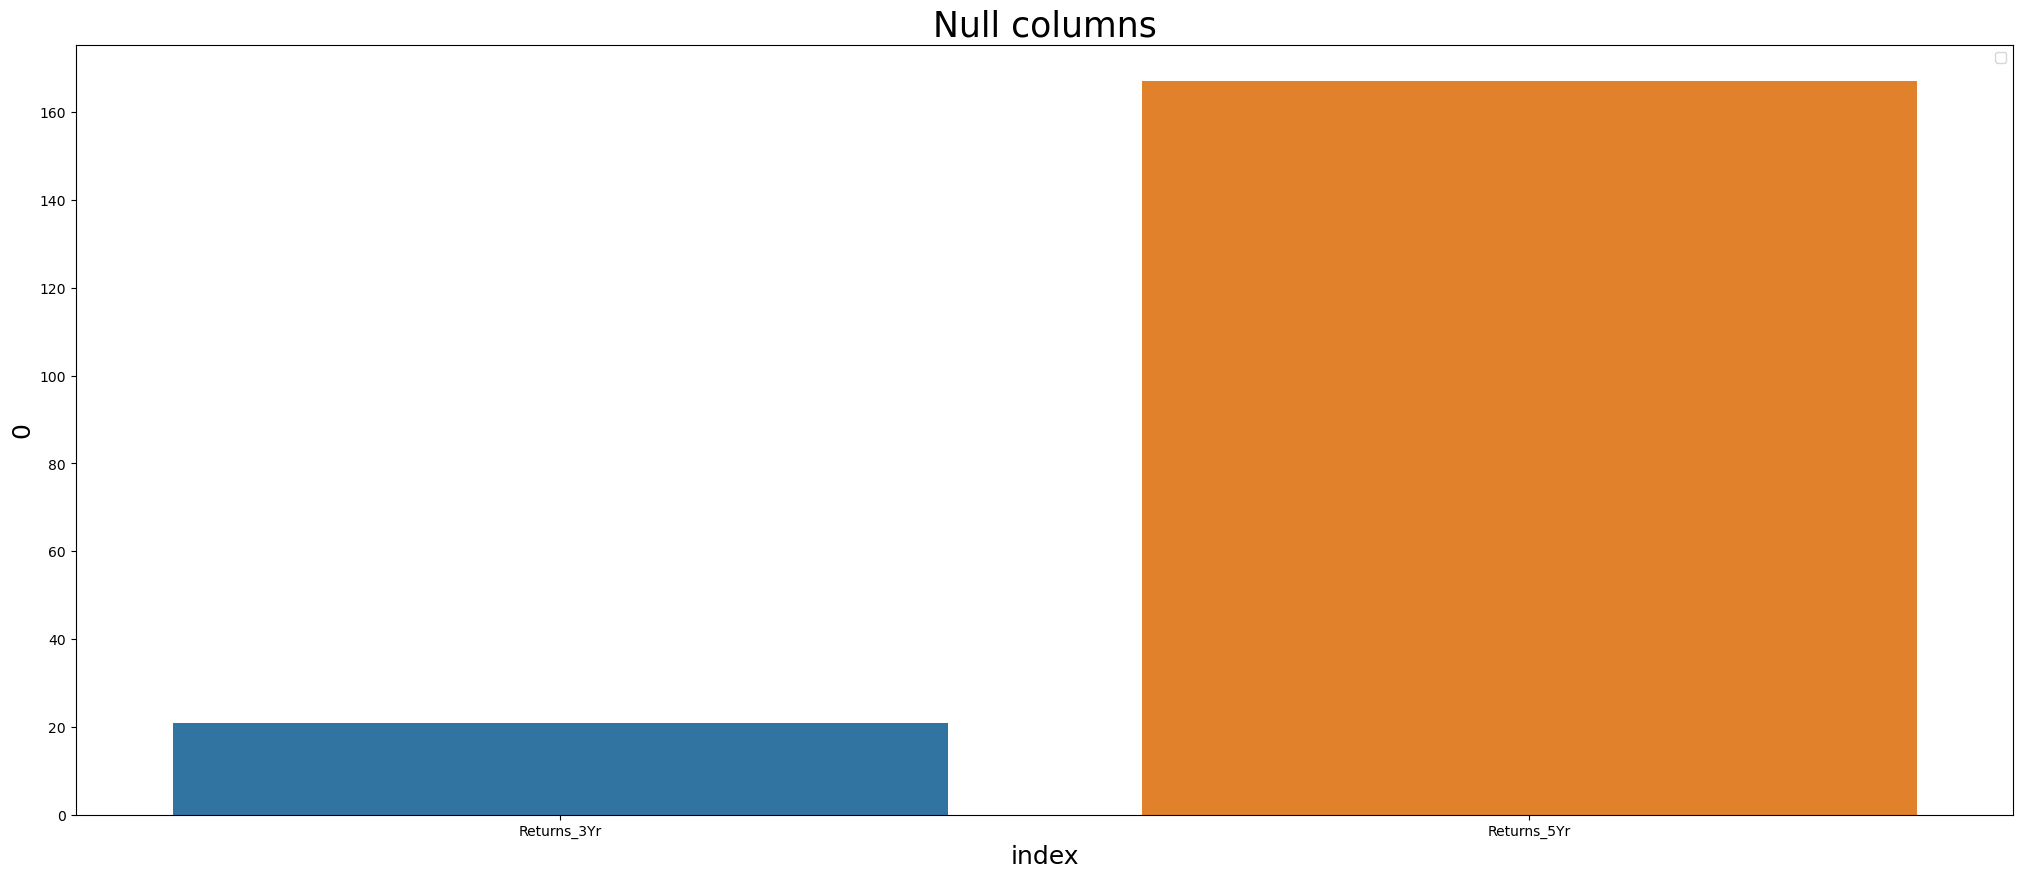

In [12]:
# Finding null columns
null_col = df.isnull().sum()
# To find the columns whose values are null  
null_col = null_col.loc[null_col>0].reset_index()
print(null_col)

# Plot the figure for those null values
plt.figure(figsize=(25,10))
plt.title("Null columns",fontsize = 25)
plt.xlabel("Columns",fontsize = 18)
plt.ylabel("Null Count", fontsize = 18)
sns.barplot(data = null_col, x='index',y = 0)
plt.legend()

<Axes: title={'center': 'Checking Null Values'}>

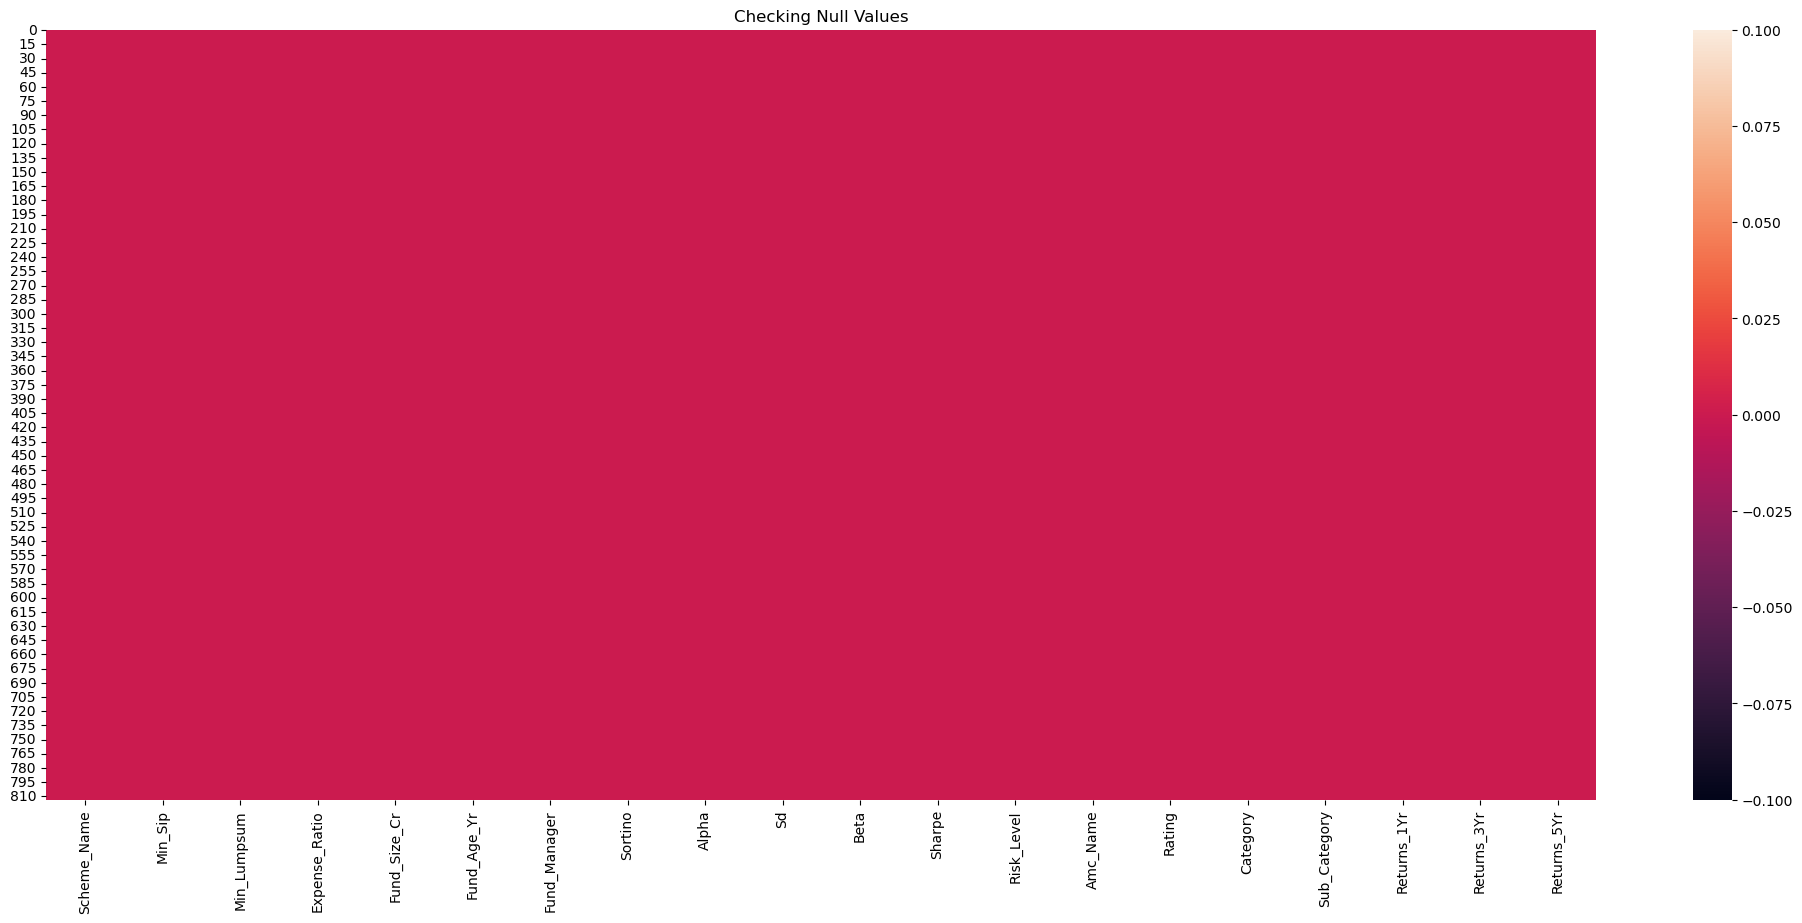

In [16]:
# As only the null values are found in two columns 
# remove those Null values
df['Returns_3Yr'] = df['Returns_3Yr'].fillna(0)
df['Returns_5Yr'] = df['Returns_5Yr'].fillna(0)

# Create a null graph to verify the results
plt.figure(figsize=(25,10))
plt.title("Checking Null Values")
sns.heatmap(df.isnull())

In [18]:
# Data is cleaned now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Scheme_Name    814 non-null    object 
 1   Min_Sip        814 non-null    int64  
 2   Min_Lumpsum    814 non-null    int64  
 3   Expense_Ratio  814 non-null    float64
 4   Fund_Size_Cr   814 non-null    float64
 5   Fund_Age_Yr    814 non-null    int64  
 6   Fund_Manager   814 non-null    object 
 7   Sortino        814 non-null    object 
 8   Alpha          814 non-null    object 
 9   Sd             814 non-null    object 
 10  Beta           814 non-null    object 
 11  Sharpe         814 non-null    object 
 12  Risk_Level     814 non-null    int64  
 13  Amc_Name       814 non-null    object 
 14  Rating         814 non-null    int64  
 15  Category       814 non-null    object 
 16  Sub_Category   814 non-null    object 
 17  Returns_1Yr    814 non-null    float64
 18  Returns_3Y

In [20]:
# Remove the unnecessary columns 
df = df.drop(columns=['Sortino','Alpha','Sd','Beta','Sharpe'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Scheme_Name    814 non-null    object 
 1   Min_Sip        814 non-null    int64  
 2   Min_Lumpsum    814 non-null    int64  
 3   Expense_Ratio  814 non-null    float64
 4   Fund_Size_Cr   814 non-null    float64
 5   Fund_Age_Yr    814 non-null    int64  
 6   Fund_Manager   814 non-null    object 
 7   Risk_Level     814 non-null    int64  
 8   Amc_Name       814 non-null    object 
 9   Rating         814 non-null    int64  
 10  Category       814 non-null    object 
 11  Sub_Category   814 non-null    object 
 12  Returns_1Yr    814 non-null    float64
 13  Returns_3Yr    814 non-null    float64
 14  Returns_5Yr    814 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 95.5+ KB


# Categorization Analysis

<Axes: title={'center': 'Fund Categories and Analysis'}, xlabel='Category', ylabel='count'>

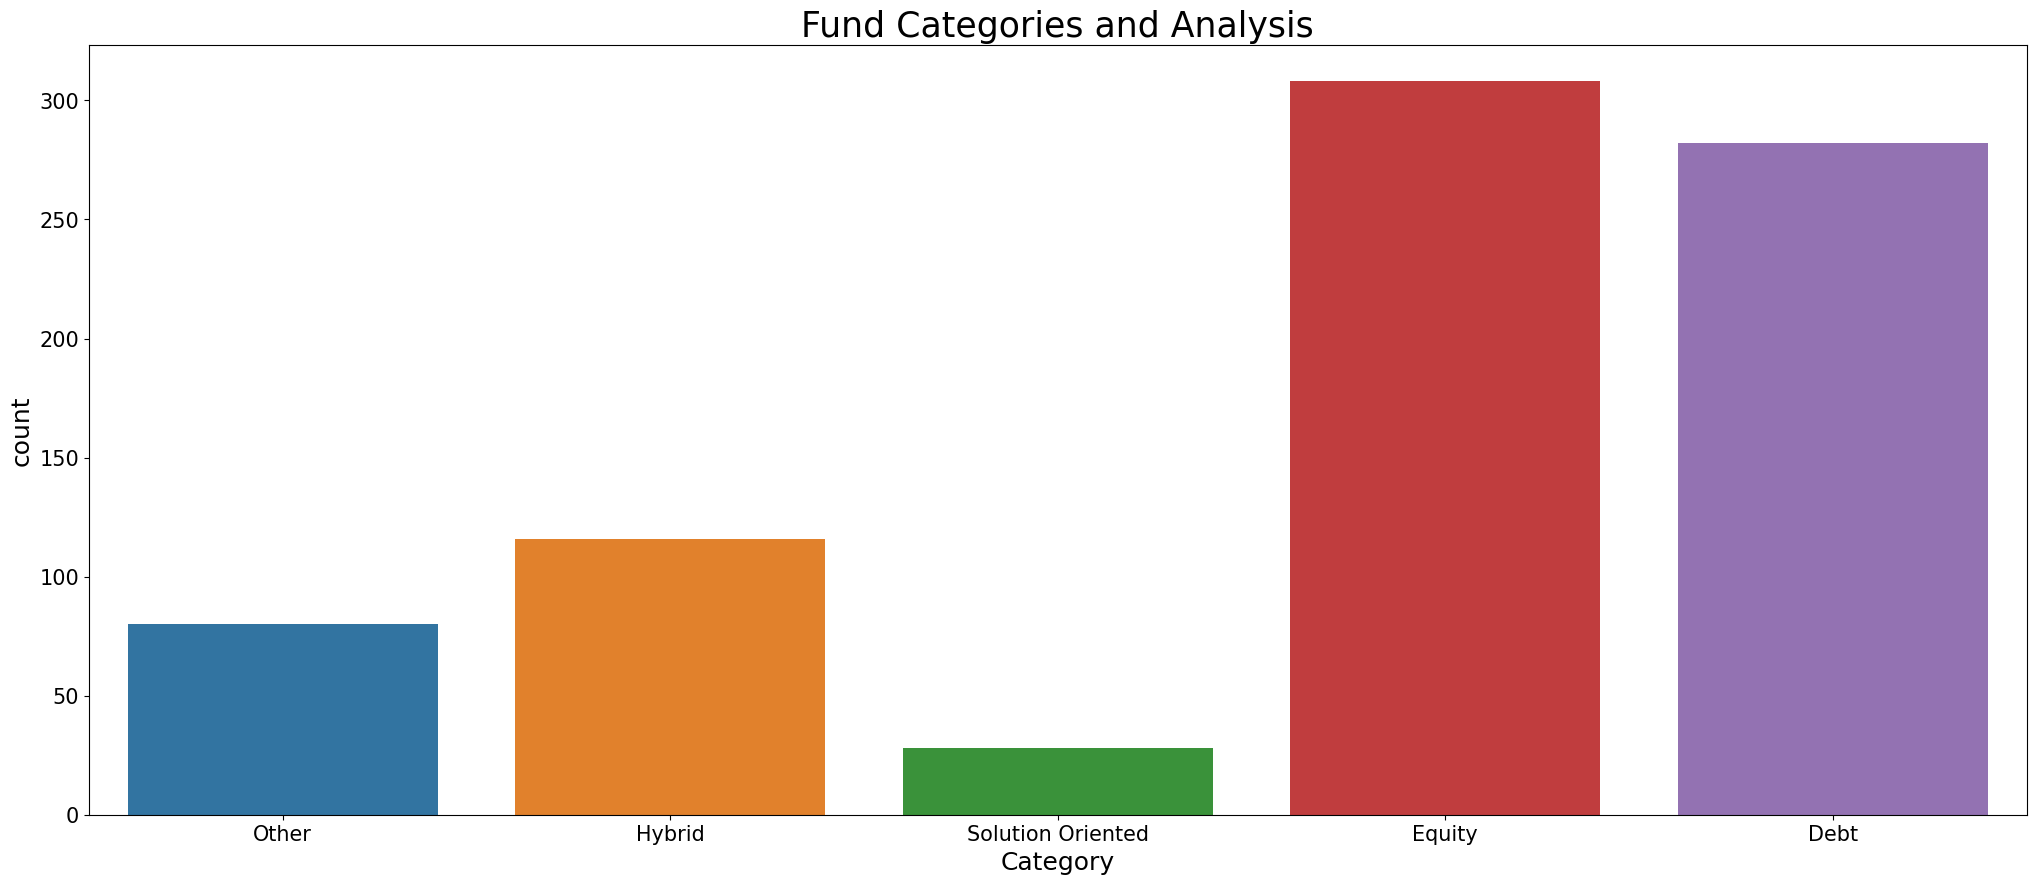

In [21]:
# As we see there are few categories and further many sub-categories of the funds lets analyze these
plt.figure(figsize=(25,10))
plt.title("Fund Categories and Analysis",fontsize = 25)
plt.xlabel('d', fontsize = 18)
plt.ylabel('d', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
sns.countplot(x=df['Category'])

<Axes: title={'center': 'Sub-Caategories'}, xlabel='Sub_Category', ylabel='count'>

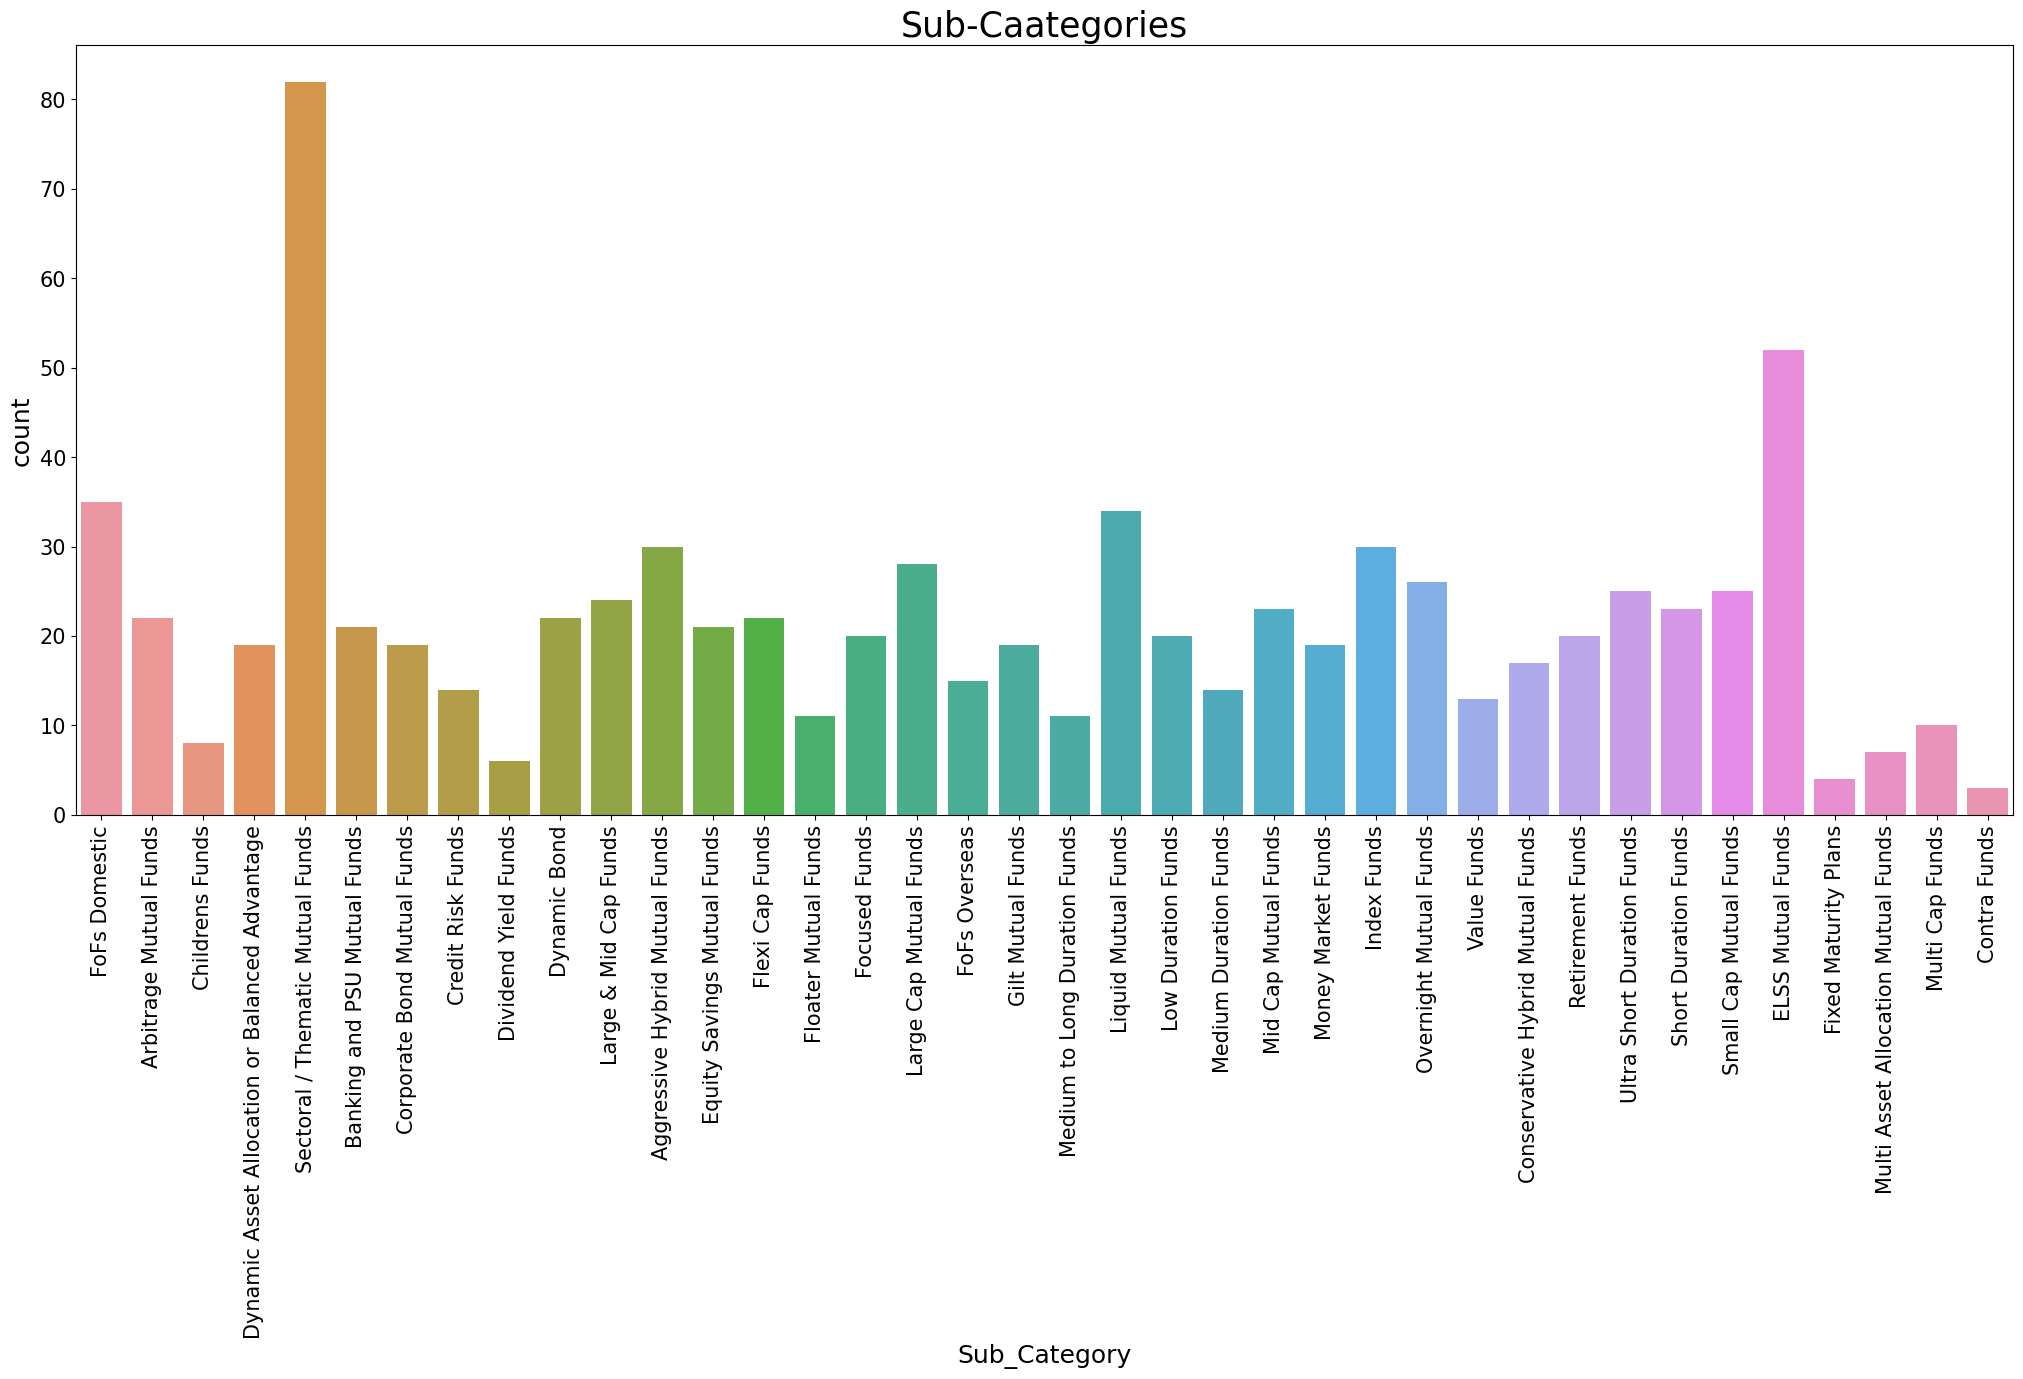

In [23]:
# And the respective Sub categories are
plt.figure(figsize = (25,10))
plt.title("Sub-Caategories", fontsize = 25)
plt.xlabel('d', fontsize = 18)
plt.ylabel('d', fontsize = 18)
plt.xticks(rotation=90, fontsize = 15)
plt.yticks(fontsize = 15)
sns.countplot(x=df['Sub_Category'])

In [25]:
# Save this Clear Data
df.to_csv('clean_mutual_funds-data.csv')